# Case 1 Nils Baker

## Read Data and Import Packages

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data_raw = pd.read_excel('Case1.xlsx', sheetname='Nils Baker data')
data_raw.head()

,ID,Total Households in Area,Households with Account,Inside/Outside Footprint
0,1,1772960,17563,Outside
1,2,1345209,14547,Outside
2,3,960434,10847,Outside
3,4,928274,18133,Inside
4,5,893995,5291,Outside


## Data Exploration

In [5]:
data_raw.describe()

,ID,Total Households in Area,Households with Account
count,120.000000,1.200000e+02,120.000000
mean,60.500000,1.626027e+05,1992.258333
std,34.785054,2.769554e+05,3301.492956
min,1.000000,1.799000e+03,13.000000
25%,30.750000,2.886075e+04,326.000000
50%,60.500000,4.608250e+04,565.000000
75%,90.250000,1.524350e+05,2092.000000
max,120.000000,1.772960e+06,18133.000000


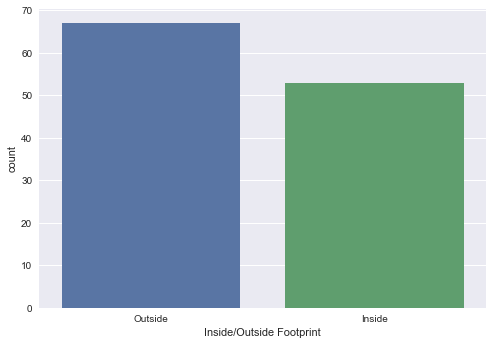

In [11]:
sns.countplot(data=data_raw, x='Inside/Outside Footprint')
plt.show()